In [2]:
import numpy as np # Para trabajar numeros aleatorios, exponenciales, logaritmos y arrays.
import matplotlib.pyplot as plt # Para graficar
from scipy.stats import norm # Para ajustar las distribuciones gaussianas
from scipy.optimize import curve_fit # Para ajustar datos dado una curva posible
from scipy.misc import derivative # para derivar funciones de forma local
import mplhep # Cambia el estilo al grafico /// si no se tiene la libreria (deberia estar en la ultima version de Anaconda) entonces se puede comentar.
plt.style.use(mplhep.style.CMS) # Tipo de grafico al estilo CMS/CERN /// comentar si no tiene  la libreria mplhep


In [3]:
def simulation(iter,spin_n):
    spin = np.zeros([iter,spin_n],dtype=int) #Arreglo de todos los posibles estados de los espines a llenar 
    arr_j = [] # arroja las posiciones en que se realiza el switch de estado en el espin

    for i in range(len(spin[0])):
        spin[0,i] = -1 # Condicion inicial, todos los espines hacia abajo


    for i in range(len(spin)-1):
        temp_j = np.random.randint(len(spin[0])) # Selecciona una posicion aleatoria en el arreglo inicial de espines
        arr_j.append(temp_j)
        for j in range(len(spin[0])): 
            if temp_j == j: # si la posicion de j coincide con la seleccionada aleatoriamente hace:
                spin[i+1,j] = spin[i,j]*(-1) # invierte la polaridad
            else:
                spin[i+1,j] = spin[i,j] # Si no coincide j con la seleccionada aleatoria, guarda la posicion del anterior estado del espin

    return np.unique(spin,axis=0) # Devuelve el arreglo que contiene todos los estados posibles de los espines ya completo y ademas sin repetir microestados.  

def sim_energy(spin): # Funcion que encuentra la energia de cada microestado
    prod = np.zeros([spin.shape[0],spin.shape[1]]) # Arreglo que se llenara con las interacciones entre espines
    energy = [] # Arreglo que almacena la suma total de interacciones en cada microestado
    k=0
    for i in spin: # toma el microestado i.
        for j in range(spin.shape[1]): # recorre cada espin en el microestado
            if j != len(i)-1:  # Condicion de frontera periodica, cuando j = len(i)-1, significa que el ultimo espin se encuentra interactuando con el primero
                prod[k,j] = i[j]*i[j+1] # interacion entre espines
            else:
                prod[k,j] = i[j]*i[j-(len(i)-1)] # interacion entre el ultimo espin y el primero.
                k+=1
    for i in prod: # toma cada valor de las iteraciones y los suma
        energy.append(-1*sum(i))  # incluye el -1 de la formula de autovalores al resolver el hamiltoniano.

    return energy # devuelve la energia correspondiente a cada microestado.

def graph(energy,col1="g",col2="darkgreen",b=32,offs=0): # Funcion que grafica, requiere la energia y algunos valores para visualizar adecuadamente los histogramas y la funcion de ajuste
    xt = np.unique(energy) # x-ticks labels
    xtt = xt+offs # set x-ticks 
    mu = np.mean(energy)+offs # encuentra la media dado los datos de energia
    std = np.std(energy) # encuentra la desviacion estandar dado los datos de energia
    x = np.linspace(min(energy),max(energy),1000000) # numero de puntos en eje x para graficar la funcion de distribucion normal asociada a los datos de energia
    p = norm.pdf(x,mu,std) # funcion de distribucion normal asociada a los datos de energia

    plt.figure(figsize=(20,8)) # Tamaño de la figura
    plt.hist(energy,bins=b,alpha=0.6,density=True,color=col1,edgecolor=col1) # histograma de los datos de energia
    plt.xticks(ticks=xtt,labels=xt,fontsize=20) # ingresa las energias correspondientes a cada bin.
    plt.plot(x,p, color=col2, linewidth=4) # grafica la funcion de ajuste dada la distribucion normal
    plt.xlabel("Energy")
    plt.ylabel("Count of microstates")
    plt.legend(["Gaussian fit of the data","Energy degenerancy"]) # indica a que pertenece los datos.
    plt.grid()
    plt.show()

    return p,mu,std # devuelve la funcion de distribucion, promedio y desviacion estandar.

def digits(iter,spin,energy): # funcion que muestra la cantidad (iter) de datos que se genero de espin y energia en cada iteracion. 
    for i in range(iter):
        print("Spin states="+str(spin[i])+"\t Energy= "+str(energy[i])) # imprime los resultados
        

In [5]:
def func(x,a,b,c,d): 
    return a*x**3+b*x**2+c*x+d # funcion de orden 3 para ajustar E(T)

# Simulation steps=1e6, N=19

In [6]:
spin = simulation(1000000,19) # todos los posibles microestados.
E = sim_energy(spin) # las energias asociadas a cada microestado.

In [7]:
2**19 # numero de posibles microestados dada la configuracion N=19

524288

In [46]:
len(spin) # numero de microestados generados por el codigo cuando steps=1e6

436721

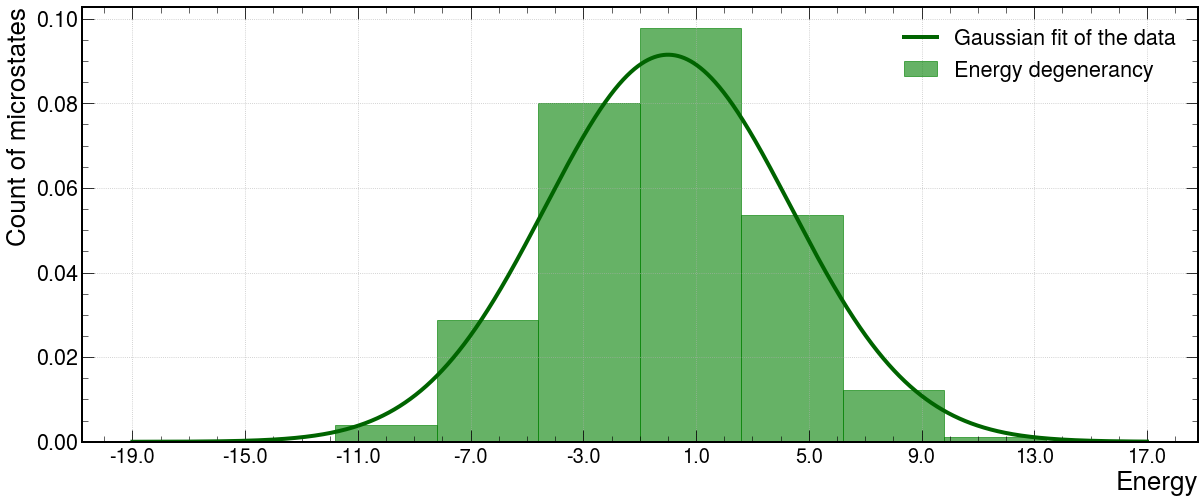

In [9]:
pdf,mu,std = graph(E,"g","darkgreen",10) # histograma de las energias obtenidas para N=19

In [10]:
print(mu) # promedio
print(std) # desviacion estandar

0.005781723342820702
4.3603379095836825


### First 5 spin states and their energy

In [14]:
digits(5,spin,E) # los 5 primeros estados para N=19 espines

Spin states=[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]	 Energy= -19.0
Spin states=[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1]	 Energy= -15.0
Spin states=[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1]	 Energy= -15.0
Spin states=[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1]	 Energy= -15.0
Spin states=[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1]	 Energy= -11.0


# Simulation steps=1e6, N=16

In [15]:
def countUniqueEnergy(energy): # funcion que retorna las energias unicas y cuantas veces se repiten
    return np.unique(energy, return_counts=True)

In [17]:
spin2 = simulation(1000000,16) # simulacion para N=16
E2 = sim_energy(spin2) # energias asociadas a los microestados
unique2,count2 = countUniqueEnergy(E2) # unique2 indica las energias unicas, count2 cuantas veces se repite cada energia o en clase es tambien llamado degenerancia

In [22]:
def zFunction(T): # funcion de particion
    suma = []
    for i in range(len(count2)):
        suma.append(count2[i]*np.exp(-unique2[i]/T)) # hace el producto de la degenerancia con el factor de boltzmann para un T independiente

    return sum(suma) # retorna la suma de todos los posibles terminos dependientes de la degenerancia.

In [24]:
E2_sort = np.sort(E2) # ordena las energias
Temp2 = np.linspace(1.53, 3.28,len(E2_sort))  # crea un barrido de temperaturas entre 1.53 y 3.28
popt2,pcov2 = curve_fit(func,Temp2,E2_sort) # ajusta usando curve_fit

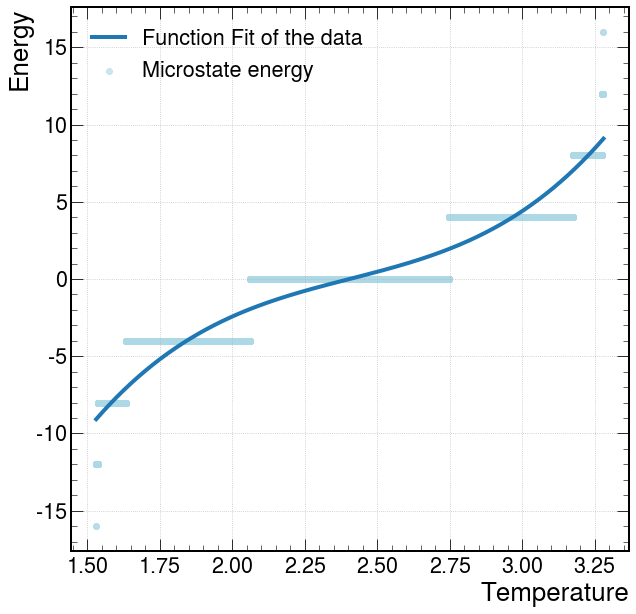

In [27]:
plt.scatter(Temp2,E2_sort,alpha=0.6,color="lightblue", label="Microstate energy") # scatter plot de las energias en cada microestado.
plt.plot(Temp,func(Temp,*popt),linewidth=4, label="Function Fit of the data") # plot del ajuste realizado
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.legend()
plt.grid()
plt.savefig("ET")
plt.show()

In [48]:
len(spin2) # numero de microestados unicos generados por la simulacion

65536

In [49]:
2**16 # numero de microestados posibles para N=16

65536

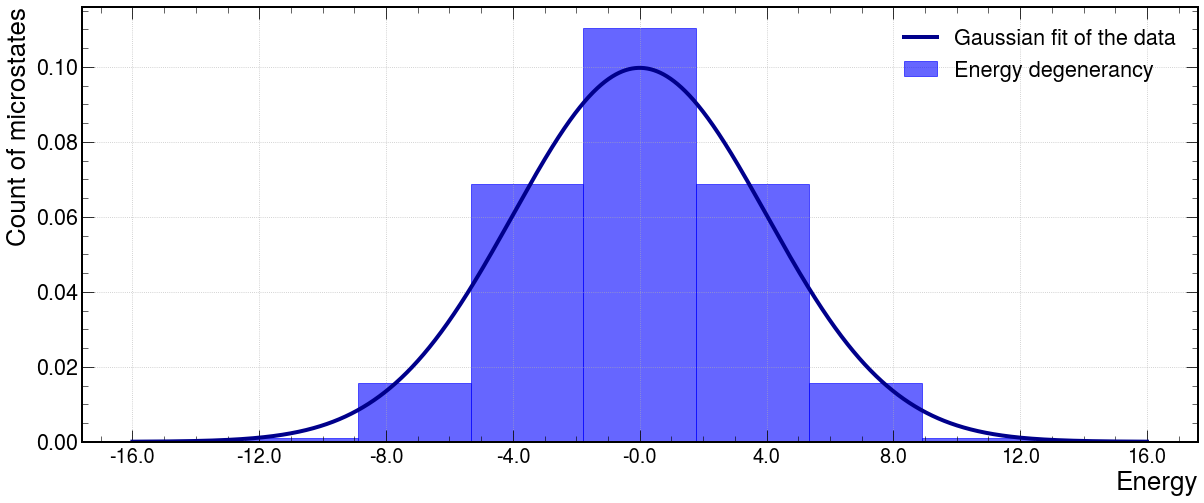

In [21]:
pdf2,mu2,std2 = graph(E2,"b","darkblue",9) # distribucion de densidad para N=16

In [ ]:
print(mu2) # promedio
print(std2) # desviacion estandar

0.0
4.0


### First 5 spin states and their energy

In [ ]:
digits(5,spin2,E2) # 5 primeros microestados para N=16 espines con su respectiva energia.

Spin states=[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]	 Energy= -16.0
Spin states=[-1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1]	 Energy= -12.0
Spin states=[-1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1]	 Energy= -12.0
Spin states=[-1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1]	 Energy= -8.0
Spin states=[-1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1]	 Energy= -4.0


# Simulation steps=1e6, N=4

In [ ]:
spin3 = simulation(1000000,4) # Simulacion para N=4
E3 = sim_energy(spin3) # energias para cada microestado.

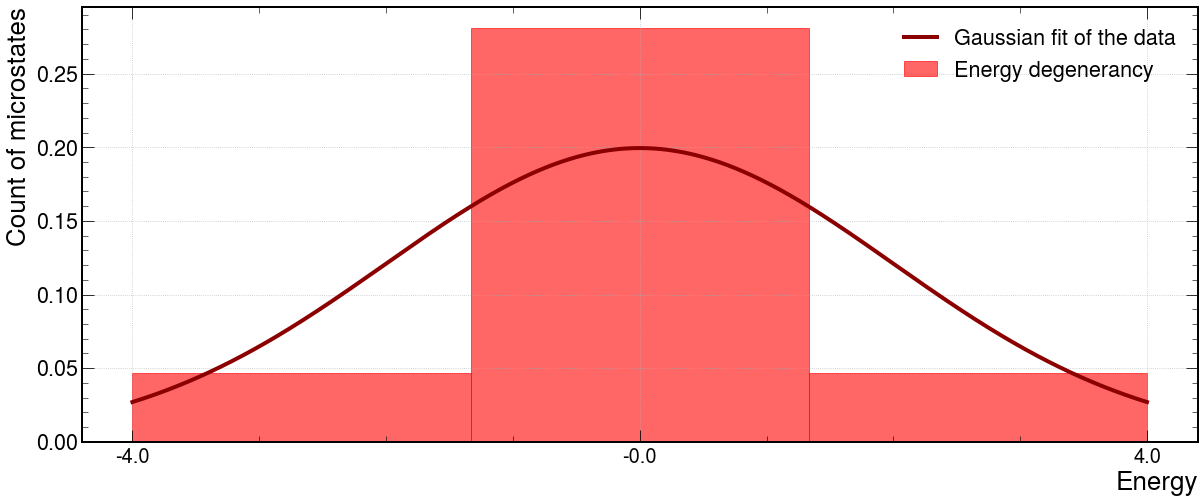

In [ ]:
pdf3, mu3, std3 = graph(E3,"r","darkred",3) # grafico de la densidad de estados para N=4

In [ ]:
print(mu3) # promedio
print(std3) # desviacion estandar

0.0
2.0


### First 5 spin states and their energy

In [ ]:
digits(5,spin3,E3) # 5 primeros microestados para N=4 espines

Spin states=[-1 -1 -1 -1]	 Energy= -4.0
Spin states=[-1 -1 -1  1]	 Energy= -0.0
Spin states=[-1 -1  1 -1]	 Energy= -0.0
Spin states=[-1 -1  1  1]	 Energy= -0.0
Spin states=[-1  1 -1 -1]	 Energy= -0.0


# Dinamica de poblaciones

In [ ]:
N = 100 # Maximum population size
a = .5/100 # birth rate
b = .5/100 # death rate

def population(N,a,b):   # Codigo del Profesor ligeramente modificado.
    nsteps = 1000 # time
    x = np.zeros(nsteps) # population over time
    x[0] = 25 # initial population
    tt = []

    for t in range(nsteps-1):
        tt.append(t)
        if 0 < x[t] < N-1:
            #is there a birth?
            birth = np.random.rand() <= a*x[t]
            #is there a death?
            death = np.random.rand() <= b*x[t]
            #We update the population size
            x[t+1] = x[t] + 1*birth - 1*death
        else:
            x[t+1] = x[t]
    tt.append(1000)
    return x,tt

In [ ]:
x1,t1 = population(N,a,b) # simulacion del Modelo poblacional para N=100
x2,t2 = population(N+50,a,b) # Simulacion para N=150
x3,t3 = population(N-70,a,b) # Simulacion para N=30

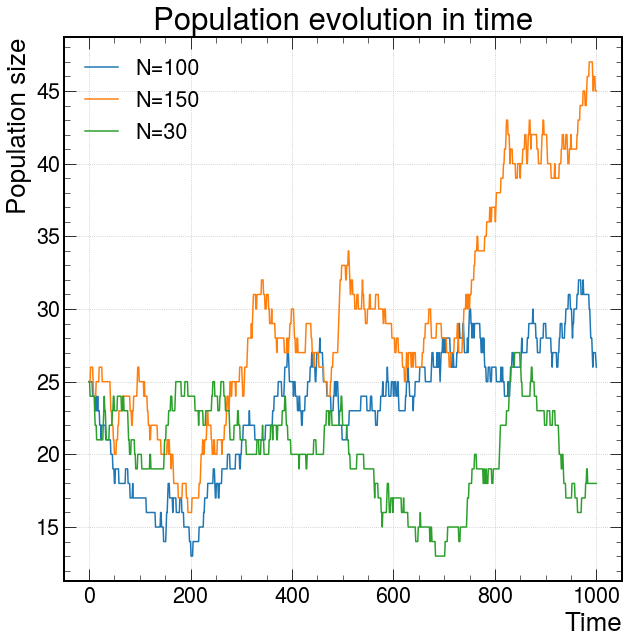

In [ ]:
plt.plot(t1,x1,label="N=100")
plt.plot(t2,x2,label="N=150")
plt.plot(t3,x3,label="N=30")
plt.title("Population evolution in time")
plt.xlabel("Time")
plt.ylabel("Population size")
plt.legend()
plt.grid()

plt.show()

In [ ]:
x11,t11 = population(N,a,b) # simulacion para a=b=0.5/100
x22,t22 = population(N,0.7/100,b) # simulacion para a=0.7/100 > b=0.5/100
x33,t33 = population(N,a,0.7/100) # simulacion para a=0.5/100 < b=0.7/100

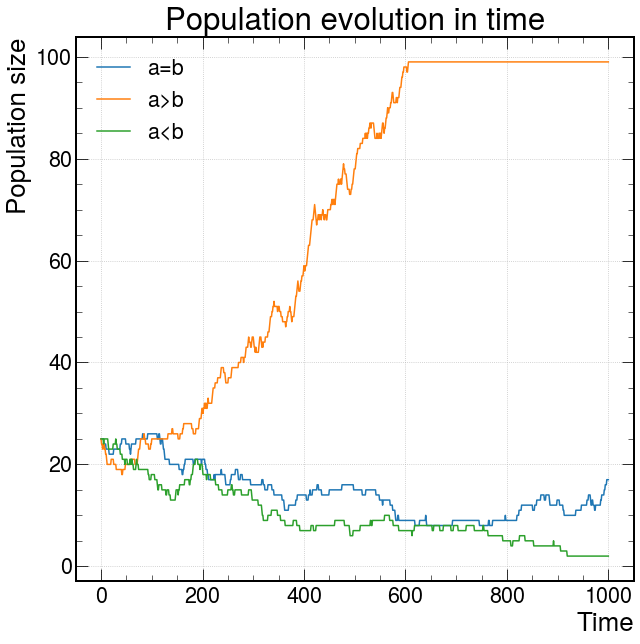

In [ ]:
plt.plot(t11,x11,label="a=b")
plt.plot(t22,x22,label="a>b")
plt.plot(t33,x33,label="a<b")
plt.title("Population evolution in time")
plt.xlabel("Time")
plt.ylabel("Population size")
plt.legend()
plt.grid()

plt.show()

In [ ]:
ntrials = 100
xx = np.random.randint(size=ntrials, low=0,high=N)


def simulate(x,nsteps): # Segundo codigo creado por el profesor.
    for _ in range(nsteps-1):
        #which trials to update?
        upd = (0<x) & (x<N-1)
        #In which trials do births occur?
        birth = 1*(np.random.rand(ntrials) <= a*x)
        #In which trials do deaths occur?
        death = 1*(np.random.rand(ntrials) <= b*x)
        #We update the population size for all trials
        x[upd] += birth[upd] - death[upd]
    print(nsteps)
    return x

nsteps_list = [10,1000,10000] # rango de valores a evaluar

In [ ]:
p1 = simulate(xx,nsteps_list[0]) # simulacion evaluada en t = 10
p2 = simulate(xx,nsteps_list[1]) # simulacion evaluada en t = 1000
p3 = simulate(xx,nsteps_list[2]) # simulacion evaluada en t = 10000

10
1000
10000


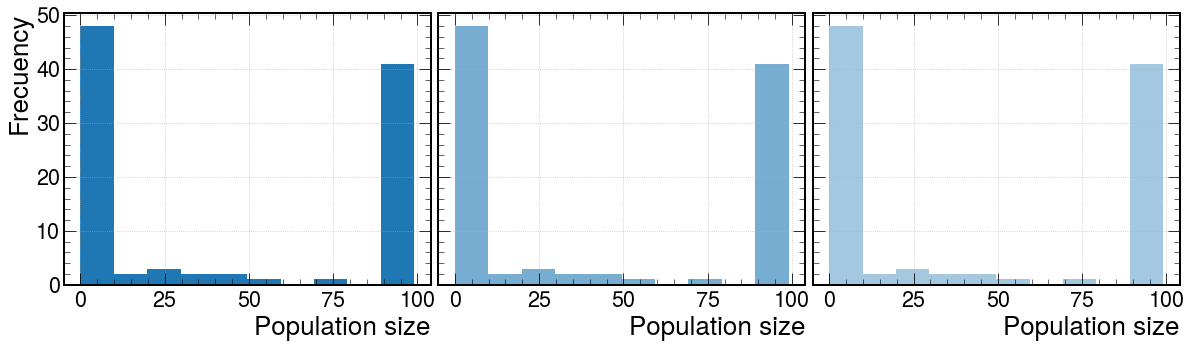

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize=(20,5))

ax1.hist(p1)
ax2.hist(p2,alpha=0.6)
ax3.hist(p3,alpha=0.4)
ax1.set_ylabel("Frecuency")
ax1.set_xlabel("Population size")
ax2.set_xlabel("Population size")
ax3.set_xlabel("Population size")
ax1.grid()
ax2.grid()
ax3.grid()

plt.subplots_adjust(wspace=0.02)
plt.show()

In [ ]:
print(np.unique(p1, return_counts=True)) # primer arreglo miestra los valores unicos de X(t), el segundo arreglo muestra cuantas veces se repite cada X(t)
print(np.unique(p2, return_counts=True))
print(np.unique(p3, return_counts=True))

(array([ 0,  2,  4,  8, 14, 21, 24, 25, 31, 32, 39, 42, 45, 53, 74, 99]), array([39,  1,  1,  2,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1, 44],
      dtype=int64))
(array([ 0,  2,  4,  8, 14, 21, 24, 25, 31, 32, 39, 42, 45, 53, 74, 99]), array([39,  1,  1,  2,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1, 44],
      dtype=int64))
(array([ 0,  2,  4,  8, 14, 21, 24, 25, 31, 32, 39, 42, 45, 53, 74, 99]), array([39,  1,  1,  2,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1, 44],
      dtype=int64))


# Simulacion de Ising para N=100 espines, para verificar la optimizacion perdiendo informacion.

In [32]:
spin4 = simulation(1000000,100) # simulacion para N=100
E = sim_energy(spin4) # energias asociadas

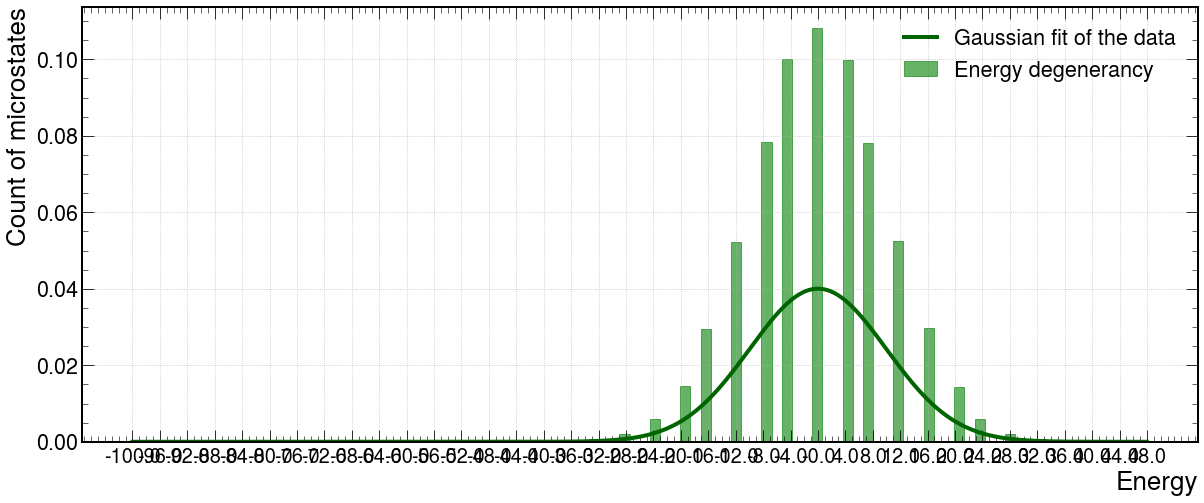

In [45]:
pdf, mu, std = graph(E,b=100) # grafico de la densidad de estados 

In [35]:
np.sqrt(100) # desviacion estandar = raiz de N= 100

10.0

In [37]:
std # desviacion estandar generada por la simulacion

9.965219174412702

In [38]:
len(spin4) # numero de combinaciones unicas generadas por la simulacion con steps= 10^6, la simulacion tardo 2 minutos aproximadamente

989865

In [39]:
2**100 # numero de combinaciones posibles para N=100

1267650600228229401496703205376